In [164]:
import matplotlib.image as img
image = img.imread("../img/gioconda.PNG")

In [165]:
image.shape

(456, 534, 4)

In [166]:
image[0]

array([[ 0.32549021,  0.42745098,  0.49803922,  1.        ],
       [ 0.32549021,  0.42745098,  0.49803922,  1.        ],
       [ 0.32156864,  0.42352942,  0.49019608,  1.        ],
       ..., 
       [ 0.38039216,  0.47450981,  0.53333336,  1.        ],
       [ 0.36862746,  0.47058824,  0.53725493,  1.        ],
       [ 0.36862746,  0.47058824,  0.54901963,  1.        ]], dtype=float32)

In [167]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\sebastien.perez\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


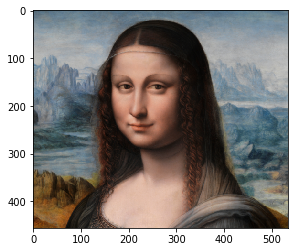

In [168]:
plt.imshow(image)

In [169]:
data=[]
for i in range(456):
    for j in range(534):
        temp=[i,j]
        for v in image[i][j]:
            temp.append(v)
        data.append(temp)

In [170]:
datadf=pd.DataFrame(data)

In [171]:
datadf.head()

,0,1,2,3,4,5
0,0,0,0.325490,0.427451,0.498039,1.0
1,0,1,0.325490,0.427451,0.498039,1.0
2,0,2,0.321569,0.423529,0.490196,1.0
3,0,3,0.325490,0.415686,0.482353,1.0
4,0,4,0.321569,0.415686,0.474510,1.0


In [172]:
import pandas as pd

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [174]:
d=10

In [175]:
rand1 = RandomForestRegressor(max_depth=d,n_estimators=10)
rand1.fit(datadf[[0,1]],datadf[2])
rand2 = RandomForestRegressor(max_depth=d,n_estimators=10)
rand2.fit(datadf[[0,1]],datadf[3])
rand3 = RandomForestRegressor(max_depth=d,n_estimators=10)
rand3.fit(datadf[[0,1]],datadf[4])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [189]:
d=15
rand1 = DecisionTreeRegressor(max_depth=d)
rand1.fit(datadf[[0,1]],datadf[2])
rand2 = DecisionTreeRegressor(max_depth=d)
rand2.fit(datadf[[0,1]],datadf[3])
rand3 = DecisionTreeRegressor(max_depth=d)
rand3.fit(datadf[[0,1]],datadf[4])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [190]:
pred=pd.DataFrame(datadf[[0,1]])

In [191]:
pred[2]=rand1.predict(datadf[[0,1]])
pred[3]=rand2.predict(datadf[[0,1]])
pred[4]=rand3.predict(datadf[[0,1]])
pred[5]=1

In [192]:
pred.head()

,0,1,2,3,4,5
0,0,0,0.325490,0.430065,0.498039,1
1,0,1,0.325490,0.427451,0.498039,1
2,0,2,0.323137,0.420000,0.484314,1
3,0,3,0.323137,0.420000,0.484314,1
4,0,4,0.323137,0.415686,0.470915,1


In [193]:
predim=pred[[2,3,4,5]].values

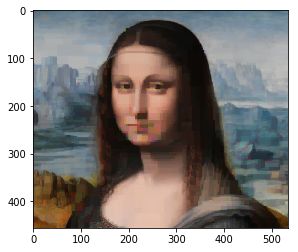

In [194]:
plt.imshow(predim.reshape(image.shape))